In [7]:
import matplotlib.pyplot as plt
import numpy as np
import regex as re

In [43]:
regexes = {'loss_AE': None, 'val_loss_AE': None, 'loss_LE': None, 'val_loss_LE': None}
for metric in regexes:
    regexes[metric] = re.compile(' ' + metric + r': [-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?')
def extract_epoch_end_metrics(filename):
    epoch_end_lines = list(filter(lambda x: 'val_' in x, open(filename, 'r').readlines()))
    r = {k: [] for k in regexes}
    for line in epoch_end_lines:
        for metric in r:
            match = regexes[metric].findall(line)
            value = float(match[0][0]+match[0][2])
            r[metric].append(value)
    return r

In [49]:
logs = [
    '/storage/weights500/ConvAutoencoderC_Pressure_Annulus64/train.log',
    '/storage/weights500/ConvAutoencoderC_U_Annulus64/train.log',
    '/storage/weights500/ConvAutoencoderC_V_Annulus64/train.log',
    '/storage/weights500/ConvAutoencoderC_W_Annulus64/train.log'
]
identifiers = ['Pressure', 'U', 'V', 'W']

In [50]:
metrics = list(map(extract_epoch_end_metrics, logs))

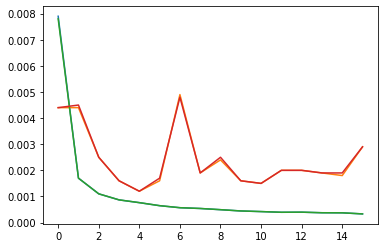

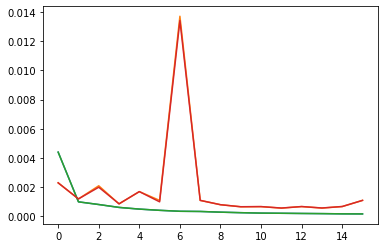

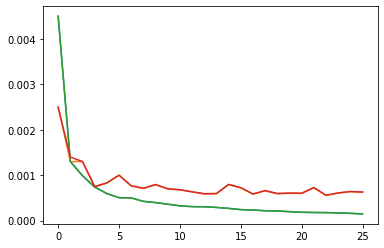

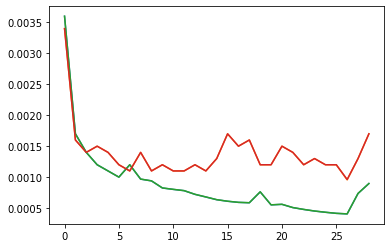

In [52]:
for ident, m in zip(identifiers, metrics):
    plt.figure()
    for mm in regexes:
        plt.plot(m[mm])
    plt.show()
    plt.close()
    